# Data Processing in Python
Python è ormai considerato il linguaggio di programmazione standard della Data Science. Uno dei motivi che lo hanno portato ad essere tale è anche la presenza della libreria Pandas: quest'ultima permette in pochissime righe di codice di performare pressochè qualsiasi operazione su dei dati.

Quando viene iniziato un progetto di Data Science, la prima cosa che si fa è, generalmente, ispezionare i dati: importarli, riorganizzarli in modo da renderli pronti per i modelli, fare dei grafici e conteggiare anomalie o valori mancanti al loro interno.

In questo esercizio metteremo le mani su un vero dataset (qui le trovate informazioni riguardo al dataset e la sua struttura, leggete con cura: https://www.kaggle.com/CooperUnion/anime-recommendations-database?select=rating.csv): vi performeremo varie operazioni, dove però vi imporrò talvolta dei vincoli sul numero di righe di codice massimo che potete scrivere, l'obiettivo dell'esercizio è infatti quello di mostrare come Pandas abbia un comando per pressoché qualsiasi operazione.

Due file .csv sono già nella stessa cartella di questo notebook: "anime.csv" e "rating.csv", scaricate tutto quanto e mettete tutto nella stessa cartella in locale.

IMPORTANTE: l'utilizzo delle librerie in Python è talvolta molto intricato e nessuno è in grado di programmare ciecamente usando una libreria. Il consiglio che vi do, valido per questo notebook ma più in generale ogni qualvolta programmerete qualcosa, è quello di cercare su internet qualcuno che abbia già fatto la stessa identica cosa che dovete fare voi. Non abbiate paura di andarvi a scrivere letteralmente su Google cose tipo "pandas how to do etc. etc.", nel 95% dei casi troverete esattamente ciò che stavate cercando, altrimenti qualcosa di simile che potrete riadattare da soli cercando nella documentazione come funzionano i comandi che vi interessano.

In [1]:
### qui potete importare tutte le librerie che vi servono
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Importare i dataset (2 righe)
anime = pd.read_csv('anime.csv', header=0)
rating = pd.read_csv('rating.csv', header=0)

In [3]:
# Visualizzare una parte di ognuno dei due dataset (2 righe)
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [4]:
rating.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [5]:
# Scegliere ed impostare un indice adeguato per il dataframe "anime" (1 riga)
anime.set_index('anime_id')

,name,genre,type,episodes,rating,members
anime_id,,,,,,
32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...
9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
5543,Under World,Hentai,OVA,1,4.28,183
5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219


In [6]:
# Ad ora il dataframe "anime" è ordinato in base al rating (decreasing). Ordinare il dataframe alfabeticamente in base al "name"
# (1 riga)
anime.sort_values(by=['name'], inplace=True)
anime.head()

,anime_id,name,genre,type,episodes,rating,members
7749,20707,&quot;0&quot;,Music,Music,1,5.06,1170
8059,25627,&quot;Aesop&quot; no Ohanashi yori: Ushi to Ka...,Kids,Movie,1,5.00,113
3156,7669,&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hat...,"Comedy, Fantasy, School",OVA,1,7.06,14351
1436,8481,&quot;Bungaku Shoujo&quot; Memoire,"Drama, Romance, School",OVA,3,7.54,18013
1199,6408,&quot;Bungaku Shoujo&quot; Movie,"Drama, Mystery, Romance, School",Movie,1,7.63,40984


In [7]:
# Ci sono degli anime il cui nome non è stato correttamente encodato, rimuovere dal dataframe tutti gli anime il cui nome 
# inizia con '.' oppure '&' (1 riga)
anime.drop(anime[((anime['name']).str.startswith('&')) | ((anime['name']).str.startswith('.'))].index , inplace=True)
anime.head()

,anime_id,name,genre,type,episodes,rating,members
8061,12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147
8062,33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37
8007,29978,001,Comedy,ONA,1,4.00,916
4268,11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307
7147,32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198


In [8]:
# Contare quanti Missing Values (NaN) ci sono in ogni colonna dei due dataframe (2 righe)
num_nan_anime = anime.isna().sum()
num_nan_rating = rating.isna().sum()
print(num_nan_anime, num_nan_rating)

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64 user_id     0
anime_id    0
rating      0
dtype: int64


In [9]:
# Rimuovere tutti i Nan dal dataframe "anime" (1 riga)
anime.dropna()

,anime_id,name,genre,type,episodes,rating,members
8061,12763,0-sen Hayato,"Historical, Military",TV,38,6.25,147
8062,33978,0-sen Hayato Pilot,"Historical, Military",OVA,1,5.14,37
8007,29978,001,Comedy,ONA,1,4.00,916
4268,11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307
7147,32737,009 Re:Cyborg x Zip,"Comedy, Super Power",ONA,10,5.68,198
...,...,...,...,...,...,...,...
484,793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547
215,6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353
341,4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2,8.17,40401
8185,29708,Üks Uks,Dementia,Movie,1,6.17,66


In [10]:
anime[anime['anime_id']==20707]

,anime_id,name,genre,type,episodes,rating,members


In [11]:
# Rimuovere tutti i rating -1 dal dataframe "rating" (1 riga)
rating.drop(rating[rating['rating']==-1].index, inplace=True)


In [12]:
rating.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [13]:
rating.describe()

,user_id,anime_id,rating
count,6.337241e+06,6.337241e+06,6.337241e+06
mean,3.674791e+04,8.902866e+03,7.808497e+00
std,2.101340e+04,8.882000e+03,1.572496e+00
min,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.898400e+04,1.239000e+03,7.000000e+00
50%,3.681500e+04,6.213000e+03,8.000000e+00
75%,5.487300e+04,1.407500e+04,9.000000e+00
max,7.351600e+04,3.447500e+04,1.000000e+01


In [14]:
# Adesso il nostro intento è utilizzare il dataframe "rating" per arricchire le informazioni contenute in "anime":
# osservare bene la struttura dei due dataframe, sebbene il rating medio per ogni anime sia già incluso nel dataframe, 
# siamo ora interessati alla deviazione standard del rating.

# Creare un dataframe che abbia come indice l'id di un anime e una colonna con all'interno la deviazione standard
# dei suoi ratings (1 riga)

std_rat =(rating.groupby(['anime_id']).std()).drop(columns='user_id', inplace=False)
std_rat.columns=['rating_std']
std_rat.tail()


,rating_std
anime_id,
34324,1.375103
34325,1.397276
34349,1.000000
34367,0.957427
34475,2.081666


In [15]:
# Unire al dataframe "anime" la colonna contenente le deviazioni standard dei rating: attenzione, questa deve essere ovviamente
# coerente con gli indici "anime_id". Quindi sostituire tutti i Nan che possono essersi generati (potremmo avere
# un anime senza alcun voto, oppure con uno solo, quindi deviazione standard Nan) con degli 0. Procedere infine a rimuovere qualsiasi colonna
# "doppione" possa essersi generate dalla prima operazione (massimo 2 righe).
anime = (pd.merge(anime, std_rat, on=['anime_id'], how='right')).fillna(0)
anime.drop_duplicates(subset=['anime_id'])
anime

,anime_id,name,genre,type,episodes,rating,members,rating_std
0,29978,001,Comedy,ONA,1,4.00,916.0,3.465705
1,11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307.0,1.675079
2,1583,009-1,"Action, Mecha, Sci-Fi, Seinen",TV,12,6.39,11097.0,1.497141
3,3234,009-1: R&amp;B,"Action, Sci-Fi, Seinen",Special,1,6.44,2988.0,1.393985
4,28761,00:08,Dementia,Movie,1,5.21,2386.0,2.150530
...,...,...,...,...,...,...,...,...
9922,11375,0,0,0,0,0.00,0.0,1.513956
9923,15219,0,0,0,0,0.00,0.0,1.486036
9924,20707,0,0,0,0,0.00,0.0,1.678147
9925,25627,0,0,0,0,0.00,0.0,0.000000


In [16]:
# Prima di procedere oltre ispezioniamo quali tipo di variabile Pandas ha assegnato (autonomamente) ad ogni colonna,
# stampare il tipo di ogni colonna di "anime" (1 riga)
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9927 entries, 0 to 9926
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    9927 non-null   int64  
 1   name        9927 non-null   object 
 2   genre       9927 non-null   object 
 3   type        9927 non-null   object 
 4   episodes    9927 non-null   object 
 5   rating      9927 non-null   float64
 6   members     9927 non-null   float64
 7   rating_std  9927 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 698.0+ KB


In [17]:
# Il tipo object è usato per le stringhe, una colonna in particolare ha un tipo assegnato che forse non è quello più corretto.
# Ispezionare tutti i possibili valori che può assumere quella colonna e trovare il motivo per cui è stata assegnata con quel 
# tipo da pandas (1 riga)
anime.episodes.unique()

array(['1', '12', '25', '2', '13', '8', '4', '3', '39', '35', '6', '15',
       '11', '7', '23', '5', '24', '48', '22', '10', '26', '51', '50',
       '178', '27', '42', '52', '31', '74', '53', '28', '43', '20', '58',
       '38', '37', '44', '54', '47', '79', '330', '104', '49', '117',
       '14', '46', '18', '45', '29', '21', '60', '16', '59', '75', '34',
       '61', '17', '366', '76', 'Unknown', '115', '128', '70', '65', '33',
       '73', '365', '180', '41', '142', '78', '170', '40', '156', '63',
       '9', '305', '151', '66', '103', '30', '163', '1787', '243', '153',
       '64', '97', '291', '100', '56', '119', '145', '175', '102', '36',
       '19', '77', '199', '108', '114', '68', '110', '113', '201', '32',
       '225', '164', '101', '140', '130', '86', '94', '1428', '109',
       '260', '62', '148', '296', '127', '312', '167', '240', '300',
       '105', '195', '203', '358', '137', '1565', '331', '373', '91',
       '55', '150', '773', '182', '155', '87', '88', '95', '96',

In [18]:
# Una volta trovato l'elemento di disturbo, rimuovere le righe del dataframe che presentano quel valore in quella colonna
# e cambiare il tipo della colonna con quello più appropriato (2 righe)
anime = anime.drop(anime[(anime['episodes']==0) | (anime['episodes']=='Unknown')].index) #tolgo anche quelli con numero di episodi 0 in quanto è come se non fossero dei film/serie
anime[['episodes']]=anime[['episodes']].apply(pd.to_numeric)
anime

,anime_id,name,genre,type,episodes,rating,members,rating_std
0,29978,001,Comedy,ONA,1,4.00,916.0,3.465705
1,11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307.0,1.675079
2,1583,009-1,"Action, Mecha, Sci-Fi, Seinen",TV,12,6.39,11097.0,1.497141
3,3234,009-1: R&amp;B,"Action, Sci-Fi, Seinen",Special,1,6.44,2988.0,1.393985
4,28761,00:08,Dementia,Movie,1,5.21,2386.0,2.150530
...,...,...,...,...,...,...,...,...
9900,3091,xxxHOLiC Kei,"Comedy, Drama, Mystery, Psychological, Superna...",TV,13,8.34,74941.0,1.178987
9901,793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547.0,1.232423
9902,6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353.0,1.245483
9903,4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2,8.17,40401.0,1.163962


In [19]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9902 entries, 0 to 9904
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   anime_id    9902 non-null   int64  
 1   name        9902 non-null   object 
 2   genre       9902 non-null   object 
 3   type        9902 non-null   object 
 4   episodes    9902 non-null   int64  
 5   rating      9902 non-null   float64
 6   members     9902 non-null   float64
 7   rating_std  9902 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 696.2+ KB


In [20]:
# Adesso siamo interessati a fare una piccola analisi suddividendo la variabile "type".
# Fare il conteggio di quanti anime ci sono per ogni tipo (1 riga)
cnt = anime.groupby(['type']).size()
# Calcolare il rating medio per ognuno di questi tipi (1 riga)
avg_rat_type = (anime.groupby(['type']).mean())['rating']
# Calcolare il numero di episodi medio per ognuno di questi tipi (1 riga)
avg_ep_type = (anime.groupby(['type']).mean())['episodes']
# Calcolare il numero di utenti totale per ognuno di questi tipi (1 riga)
tot_mem_type = (anime.groupby(['type']).sum())['members']
print("Number of anime per type: {}".format(cnt))
print("Average Rating per type: {}".format(avg_rat_type))
print("Average number of Episodes per type: {}".format(avg_ep_type))
print("Total number of Members per type: {}".format(tot_mem_type))

Number of anime per type: type
Movie      1751
Music       444
ONA         478
OVA        2723
Special    1441
TV         3065
dtype: int64
Average Rating per type: type
Movie      6.477773
Music      5.647838
ONA        5.707155
OVA        6.407113
Special    6.646405
TV         7.054065
Name: rating, dtype: float64
Average number of Episodes per type: type
Movie       1.043404
Music       1.092342
ONA         5.673640
OVA         2.510834
Special     2.678001
TV         35.448613
Name: episodes, dtype: float64
Total number of Members per type: type
Movie       23734784.0
Music         636140.0
ONA          2653767.0
OVA         19298662.0
Special     12727876.0
TV         157131864.0
Name: members, dtype: float64


In [21]:
# Adesso siamo interessati a studiare i generi ("genre") degli anime. La prima cosa da fare è un "parsing" della colonna genre.
# In particolare, proveremo adesso a cambiare la struttura del dataframe, calcolando innanzitutto quanti differenti generi ci
# sono in totale, e aggiungendo quindi una colonna per ogni genere al dataframe dal contenuto binario: 1 se l'anime in quella 
# riga contiene quel genere tra i suoi e 0 altrimenti. Questa struttura ci faciliterà in alcune analisi e sostituira la colonna 
# 'genre' che è altrimenti di difficile utilizzo.

# Ottenere il conteggio delle apparizioni di tutti i differenti generi possibili (si può fare una riga ma è hardcore,
# comunque non più di 4-5 righe)

genres=(anime['genre']).tolist()
genres=(','.join(map(str, genres))).replace(' ', '')
genres=genres.split(',')
genres=list(set(genres))
genres.remove('0')
print(genres, len(genres)) #metodo con 5 righe

genres_count =len(list(set(((','.join(map(str, (anime['genre']).tolist()))).replace(' ', '')).split(','))))-1
print(genres_count) #metodo con una riga, check: lunghezze uguali (43)
# (per chi vuole provarlo a fare in una sola riga, io ho utilizzato un Counter e i metodi delle liste join, split e replace)



['Military', 'Space', 'Hentai', 'Samurai', 'Harem', 'Vampire', 'Romance', 'Sports', 'Josei', 'Action', 'SliceofLife', 'Yaoi', 'Drama', 'Dementia', 'Cars', 'Thriller', 'Demons', 'Music', 'Shounen', 'Police', 'School', 'Yuri', 'ShounenAi', 'Kids', 'SuperPower', 'Ecchi', 'Magic', 'Mecha', 'Game', 'Shoujo', 'Supernatural', 'Comedy', 'Sci-Fi', 'Fantasy', 'Mystery', 'Historical', 'Horror', 'MartialArts', 'Seinen', 'ShoujoAi', 'Parody', 'Psychological', 'Adventure'] 43
43


In [22]:
# Adesso aggiungere al dataframe una colonna per ogni genere contenenti labels binarie (1-0 oppure True-False).
# Anche qui, si può fare tutto in una riga ma è davvero intricato, usando il comando join di pandas e il metodo contains delle stringhe.
# Comunque non ci vogliono più di 4-5 righe.

for i in range(genres_count):
    anime=anime.merge(pd.Series((anime['genre']).str.contains(genres[i]), name=genres[i]), how='left', left_index=True, right_index=True)
anime

,anime_id,name,genre,type,episodes,rating,members,rating_std,Military,Space,...,Fantasy,Mystery,Historical,Horror,MartialArts,Seinen,ShoujoAi,Parody,Psychological,Adventure
0,29978,001,Comedy,ONA,1,4.00,916.0,3.465705,False,False,...,False,False,False,False,False,False,False,False,False,False
1,11755,009 Re:Cyborg,"Action, Adventure, Mecha, Sci-Fi",Movie,1,6.76,8307.0,1.675079,False,False,...,False,False,False,False,False,False,False,False,False,True
2,1583,009-1,"Action, Mecha, Sci-Fi, Seinen",TV,12,6.39,11097.0,1.497141,False,False,...,False,False,False,False,False,True,False,False,False,False
3,3234,009-1: R&amp;B,"Action, Sci-Fi, Seinen",Special,1,6.44,2988.0,1.393985,False,False,...,False,False,False,False,False,True,False,False,False,False
4,28761,00:08,Dementia,Movie,1,5.21,2386.0,2.150530,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900,3091,xxxHOLiC Kei,"Comedy, Drama, Mystery, Psychological, Superna...",TV,13,8.34,74941.0,1.178987,False,False,...,False,True,False,False,False,False,False,False,True,False
9901,793,xxxHOLiC Movie: Manatsu no Yoru no Yume,"Comedy, Drama, Mystery, Psychological, Superna...",Movie,1,8.04,41547.0,1.232423,False,False,...,False,True,False,False,False,False,False,False,True,False
9902,6864,xxxHOLiC Rou,"Mystery, Supernatural",OVA,2,8.32,36353.0,1.245483,False,False,...,False,True,False,False,False,False,False,False,False,False
9903,4918,xxxHOLiC Shunmuki,"Comedy, Drama, Mystery, Psychological, Superna...",OVA,2,8.17,40401.0,1.163962,False,False,...,False,True,False,False,False,False,False,False,True,False


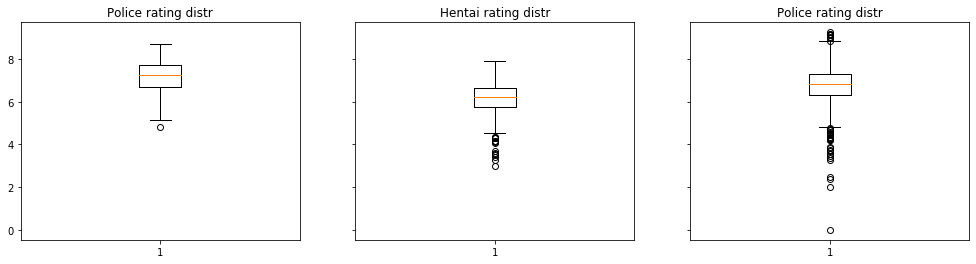

In [24]:
# L'ultima richiesta che vi farò è quella di creare dei plot descrittivi (con matplotlib) dei dati, in particolare:
# 1) scegliete tre generi e plottate in una unica riga, allineati, i boxplot che descrivono la distribuzione dei loro ratings

genre1='Police'
genre2='Hentai'
genre3='Sci-Fi'

fig, axs = plt.subplots(1, 3, sharey=True, figsize = (17,4))
axs[0].set_title(f'{genre1} rating distr')
axs[0].boxplot((anime[anime[genre1]==True])['rating'])

axs[1].set_title(f'{genre2} rating distr')
axs[1].boxplot((anime[anime[genre2]==True])['rating'])

axs[2].set_title(f'{genre1} rating distr')
axs[2].boxplot((anime[anime[genre3]==True])['rating'])

plt.show()

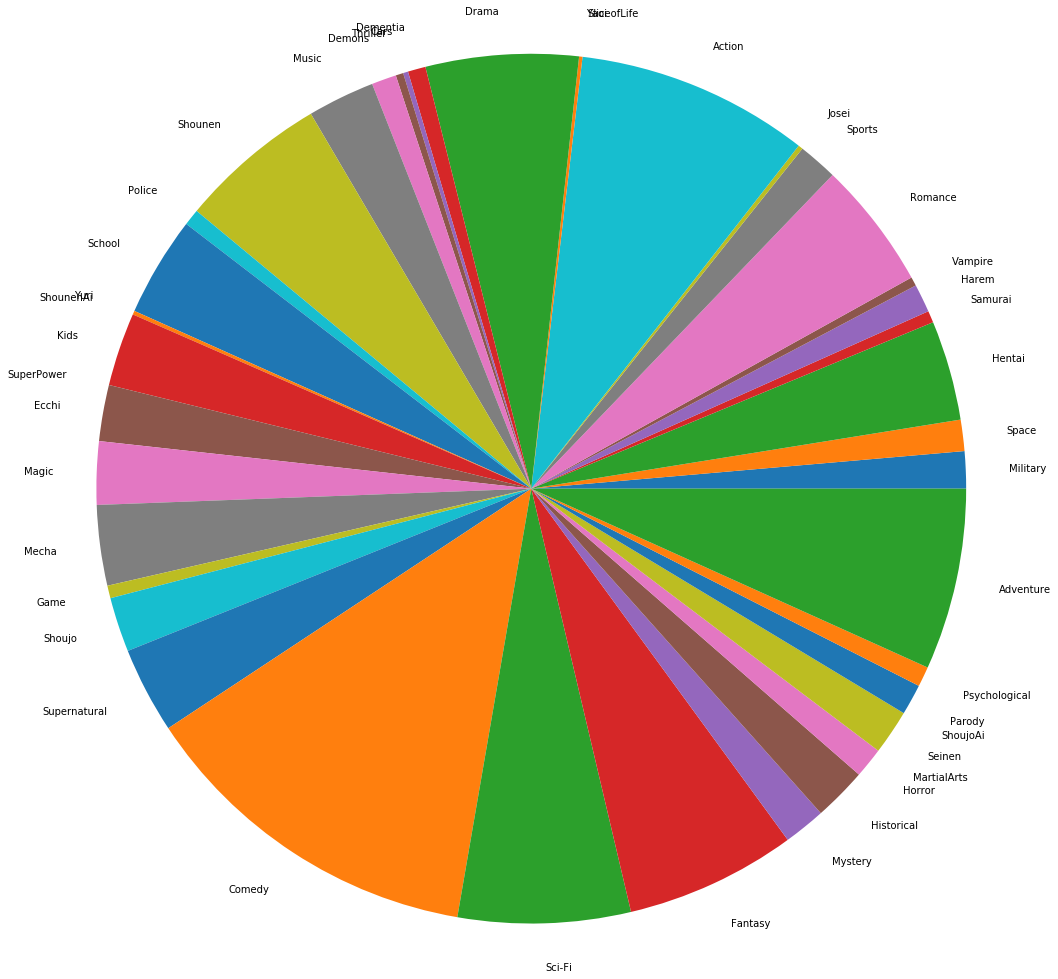

In [36]:
# 2) create un pie chart per i generi

plt.pie(np.array([((anime[anime[genres[i]]==True]).shape)[0] for i in range(genres_count)]), labels=genres, radius=5) #aumento raggio così diventa più leggibile
plt.show()   

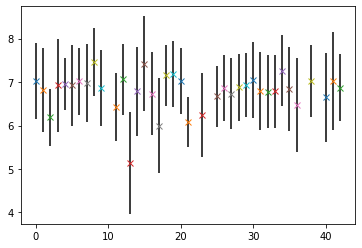

In [26]:
# 3) plottate in un unico grafico, uno dopo l'altro, la media dei ratings per ogni genere, la media meno la deviazione standard
# e la media più la deviazione standard, in modo da avere per ogni genere una sorta di intervallo di confidenza per i ratings

for i in range(genres_count):
    mean=((anime[anime[genres[i]]==True])['rating']).mean()
    std=((anime[anime[genres[i]]==True])['rating']).std()
    plt.plot(i , mean, 'x')
    plt.vlines(i, mean+std, mean-std) #metto indici al posto del nome così evito sovrapposizione di nomi sul grafico
plt.show()

In [ ]:
# ANALISI LIBERA
# Adesso le possibilità sono pressoché infinite, potete studiare settorialmente i generi, i type, le distribuzioni dei rating 
# nelle varie sottofamiglie, etc.
# Questo è un ottimo dataset per esercitarsi a gestire feature binarie e metodi di classificazione o regressione molto semplici,
# per chi è interessato all'ambito Data Science è sicuramente un ottimo esercizio. Per chiunque avesse curiosità a riguardo 
# o semplicemente cercasse consigli è libero di contattarmi: Gianmarco Genalti +393479163061